## HW3

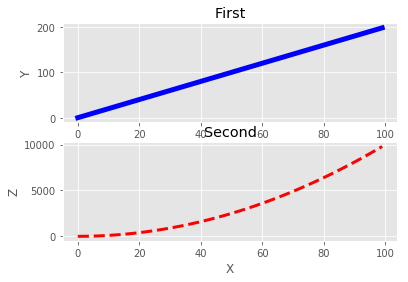

In [7]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
 
x = np.arange(0, 100)
y = x * 2
z = x ** 2
plt.subplot(    211   )
plt.plot(x,y,color =   "blue"  ,   lw=  5)
plt.xlabel("X")
plt.ylabel("Y")
plt. title    ("First")
plt.subplot(   212    )
plt.plot(x,z,color="red",  lw   =3,  ls    ="--")
plt.xlabel("X")
plt.ylabel("Z")
plt.title("Second")

## HW4

4.1. 어느 범죄학 연구자가 인구밀도와 절도발생률 간의 관계를 연구하면서 다음의 16개 도시의 자료를 수집하였다. X는 해당 도시의 단위면적당 인구밀도를, Y는 이전년도의 10만명당 절도범죄의 발생횟수를 조사한 것이다.

파이썬을 이용하여 회귀분석식을 구하고, 각자 회귀분석식에 대한 평가를 진행해보시기 바랍니다.

데이터: 

X:{ 59, 49, 75, 54, 78, 56, 60, 82, 69, 83, 88, 94, 47, 65, 89, 70}

Y:{ 209, 180, 195, 192, 215, 197, 208, 189, 213, 201, 214, 212, 205, 186, 200, 204} 

a value :  182.972499437
a value :  [ 0.26157425]
R_squared :  0.133233171788
SCORE : 0.133233171788
Mean_Squared_Error :  92.6898776919
RMSE :  9.62755824142


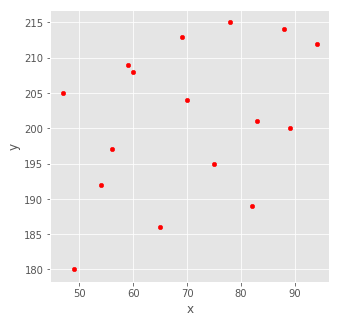

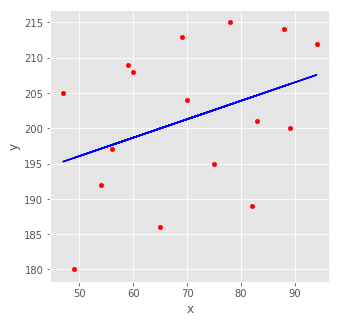

In [4]:
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

data = {'x' : [59, 49, 75, 54, 78, 56, 60, 82, 69, 83, 88, 94, 47, 65, 89, 70],
            'y' : [209, 180, 195, 192, 215, 197, 208, 189, 213, 201, 214, 212, 205, 186, 200, 204]}

data = pd.DataFrame(data) # pandas.DataFrame 함수를 통해서 2차원의 수정 가능한 테이블 형태의 표 형태로 저장

data.plot(kind='scatter', x='x', y='y', figsize=(5,5), color='red') 
    # kind : 기본 선 이외의 여러 가지 플롯 스타일
    # x,y 파라미터 : 가로와 세로에 표시할 데이터 지정
    # figsize : 플롯의 크기를 조정
    # color : 원하는 생상
    
# 데이터 학습
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X = pd.DataFrame(data["x"]), y =data["y"])
prediction = linear_regression.predict(X=pd.DataFrame(data["x"]))
print("a value : ", linear_regression.intercept_)
print("a value : ", linear_regression.coef_) # 선형회귀모델의 b계수를 출력
residuals = data['y'] - prediction
residuals.describe()

# 적합도 검증
SSE = (residuals ** 2).sum()
SST = ((data['y']-data['y'].mean())**2).sum()
R_squared = 1 - (SSE/SST)
print('R_squared : ', R_squared) # 출력값 : 0.975, x값이 y값에 많은 영향

# 플롯 나타내기
data.plot(kind='scatter', x='x', y='y', figsize=(5,5), color='red') 

# plot regression line
plt.plot(data["x"], prediction, color="blue") # 에러뜨는데..

# 생성된 회귀분석 모델의 성능평가
from sklearn.metrics import mean_squared_error
print("SCORE :", linear_regression.score(X=pd.DataFrame(data["x"]), y=data["y"]))
print("Mean_Squared_Error : ", mean_squared_error(prediction, data["y"]))
print("RMSE : ", mean_squared_error(prediction, data['y'])**0.5)


## HW5

In [ ]:
from sklearn import linear_model
from sklearn import datasets
from sklearn.metrics import mean_squared_error
import pandas as pd
diabetes_data = datasets.load_diabetes()
X = pd.DataFrame(diabetes_data.data)
y = diabetes_data.target
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X = pd.DataFrame(X), y = y)
prediction = linear_regression.predict(X = pd.DataFrame(X))
print('a value = ', linear_regression.intercept_)
print('b balue =', linear_regression.coef_)
residuals = y-prediction
SSE = (residuals**2).sum()
SST = ((y-y.mean())**2).sum()
R_squared = 1 - (SSE/SST)
print('R_squared = ', R_squared)
print('score = ', linear_regression.score(X = pd.DataFrame(X), y = y))
print('Mean_Squared_Error = ', mean_squared_error(prediction, y))
print('RMSE = ', mean_squared_error(prediction, y)**0.5)

## HW7

In [4]:
from sklearn.neural_network import MLPClassifier
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
digits = datasets.load_digits() # digits 데이터
X = digits.data #feature 값
y = digits.target #target 값
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2) # 분류
scaler = StandardScaler() # 데이터 정규화 함수 생성
scaler.fit(X_train) # 데이터 정규화 함수 학습
X_train = scaler.transform(X_train) # 데이터 정규화
X_test = scaler.transform(X_test) # 데이터 정규화
ANN = MLPClassifier(hidden_layer_sizes=(10,10,10)).fit(X_train, y_train) # 모델 생성, 학습
print(ANN.score(X=X_test, y=y_test)) # accuracy 값 측정

0.958333333333


/home/chulgyoo/.pyenv/versions/3.6.1/envs/kmooc/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
